In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\Users\muhammadsaif\OneDrive\Desktop\Oasis-Infobyte\Task 3\archive\used_cars.csv')

df.rename(columns={'milage': 'mileage'}, inplace=True)

print("Dataset Columns:", df.columns.tolist())

print("\nDataset Info Before Cleaning:")
print(df.info())

df.head()

Dataset Columns: ['brand', 'model', 'model_year', 'mileage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

Dataset Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   mileage       4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None


,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
print("Data type of 'price' before cleaning:", df['price'].dtype)
print("Data type of 'mileage' before cleaning:", df['mileage'].dtype)
print("Data type of 'model_year' before cleaning:", df['model_year'].dtype)

if df['price'].dtype == 'object':
    df['price'] = df['price'].replace(r'[^0-9.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

if df['mileage'].dtype == 'object':
    df['mileage'] = df['mileage'].replace(r'[^0-9.]', '', regex=True)
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

if df['model_year'].dtype == 'object':
    df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

print("\nData type of 'price' after cleaning:", df['price'].dtype)
print("Data type of 'mileage' after cleaning:", df['mileage'].dtype)
print("Data type of 'model_year' after cleaning:", df['model_year'].dtype)

print("\nDataset Info After Cleaning:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

numerical_cols = ['model_year', 'mileage', 'price']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

categorical_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

print("\nSummary Statistics:")
print(df.describe())

Data type of 'price' before cleaning: int64
Data type of 'mileage' before cleaning: object
Data type of 'model_year' before cleaning: int64

Data type of 'price' after cleaning: int64
Data type of 'mileage' after cleaning: float64
Data type of 'model_year' after cleaning: int64

Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   mileage       4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 n

C:\Users\muhammadsaif\AppData\Local\Temp\ipykernel_3608\3354999208.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


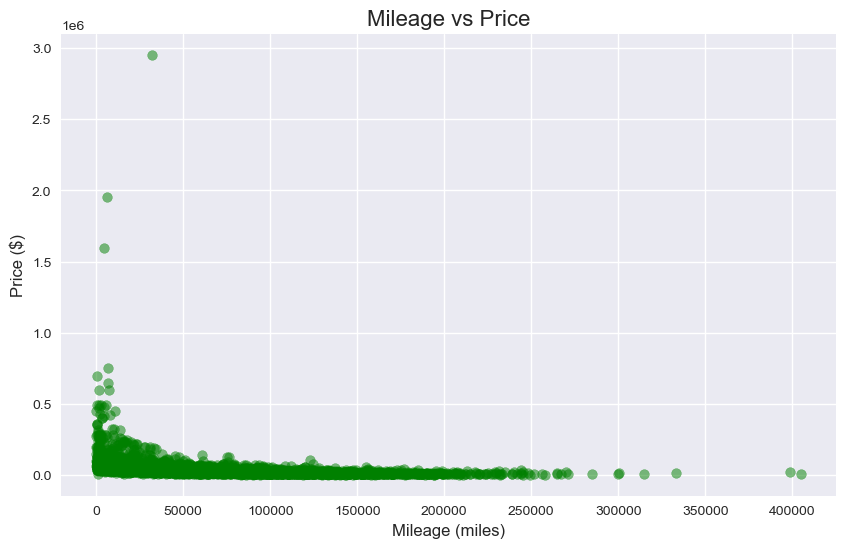

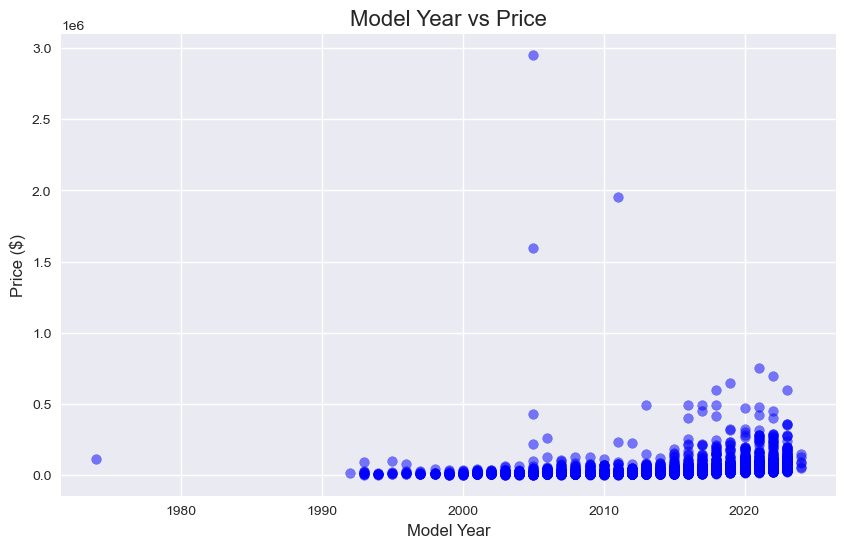

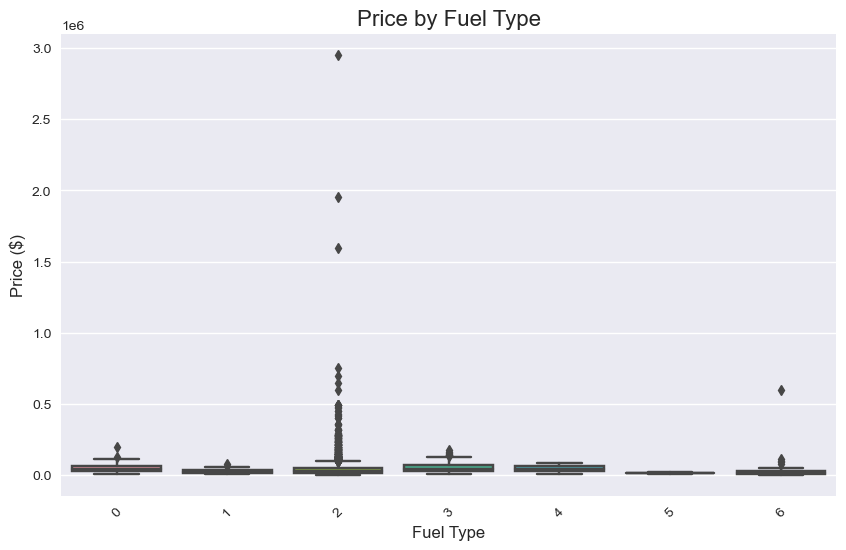

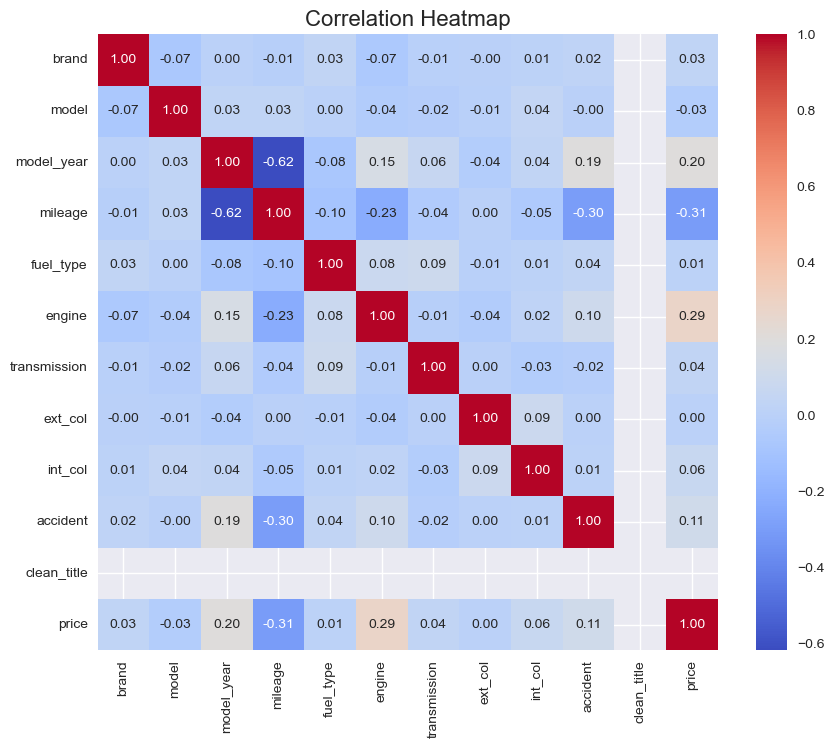

In [4]:
plt.style.use('seaborn')

plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], color='green', alpha=0.5)
plt.title('Mileage vs Price', fontsize=16)
plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['price'], color='blue', alpha=0.5)
plt.title('Model Year vs Price', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [5]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Mean Squared Error: 17732996215.32
R² Score: 0.13


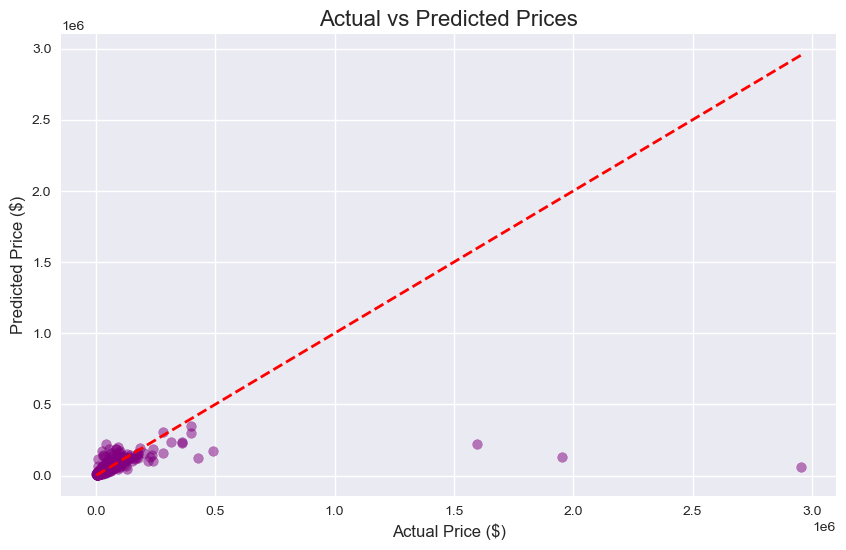

Predicted Price for the new car: $48763.58


In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.grid(True)
plt.show()

new_car = pd.DataFrame({
    'brand': [label_encoder.fit_transform(['Toyota'])[0]],
    'model': [label_encoder.fit_transform(['Camry'])[0]],
    'model_year': [2020],
    'mileage': [30000],
    'fuel_type': [label_encoder.fit_transform(['Gasoline'])[0]],
    'engine': [label_encoder.fit_transform(['2.5L 4-Cylinder'])[0]],
    'transmission': [label_encoder.fit_transform(['Automatic'])[0]],
    'ext_col': [label_encoder.fit_transform(['Black'])[0]],
    'int_col': [label_encoder.fit_transform(['Black'])[0]],
    'accident': [label_encoder.fit_transform(['None'])[0]],
    'clean_title': [label_encoder.fit_transform(['Yes'])[0]]
})

predicted_price = model.predict(new_car)
print(f"Predicted Price for the new car: ${predicted_price[0]:.2f}")